### 01. 합성곱과 풀링(Convolutional and Pooling)
- 합성곱 신경망(Convolutional Neural Network)은 이미지 처리에 탁월한 성능을 보이는 신경망이다.
- 합성곱층(Convolution layer)과 풀링층(Pooling layer)으로 구성된다. 

In [19]:
from IPython.display import Image

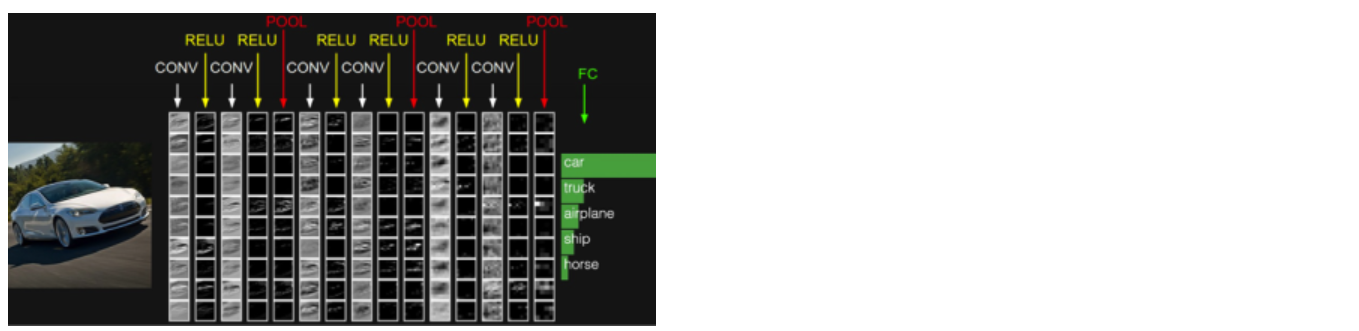

In [21]:
Image("c1.PNG")

- 합성곱층
    - CONV는 합성곱 연산을 의미한다. 
    - 합성곱 연산의 결과가 활성화 함수 ReLU를 지난다.
- 풀링층
    - 그 후에 POOL이라는 구간을 지나는데 이는 풀링 연산을 의미하며 풀링층이라고 한다.

#### (1) 합성곱 신경망의 대두

1. 합성곱 신경망은 이미지 처리에 탁월한 성능을 보이는 신경망이다.
2. 이미지 처리를 하기 위해서 **다층 퍼셉트론**을 사용할 수는 있지만 한계가 있다. 
3. 예제 : 알파벳 손글씨를 분류하는 문제
    - 아래의 그림은 알파벳 Y를 비교적 정자로 쓴 손글씨와 다소 휘갈겨 쓴 손글씨 두 개를 2차원 텐서인 행렬로 표현한 것이다. 
    - 사람이 보기에는 두 그림 모두 알파벳 Y로 손쉽게 판단이 가능하지만 기계가 보이에는 각 픽셀마다 가진 값이 거의 상이하므로 완전히 다른 값을 가진 입력이다. 
    - 그런데 이미지라는 것은 위와 같이 같은 대상이라도 휘어지거나, 이동되었거나, 방향이 뒤틀렸거나 등 다양한 변형이 존재한다.
    - 다층 퍼셉트론은 몇가지 픽셀만 값이 달라져도 민감하게 예측에 영향을 받는다는 단점이 있다.

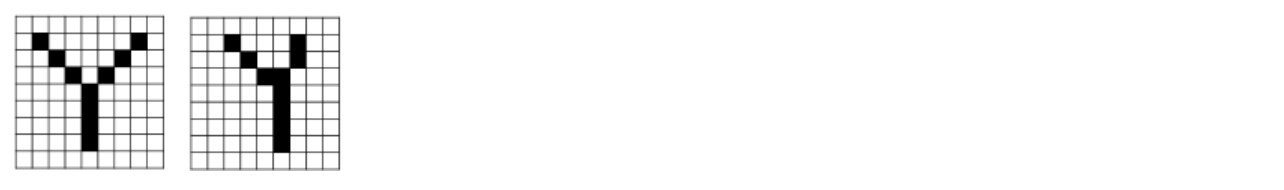

In [22]:
Image("c2.PNG")

   - 위 손글씨를 다층 퍼셉트론으로 분류하려면,
        - 이미지를 1차원 텐서인 벡터로 변환
        - 다층 퍼셉트론의 입력층으로 사용해야 한다.
        - 두번째 손글씨를 다층 퍼셉트론으로 분류하기 위해서 벡터로 바꾸면 아래와 같다. 

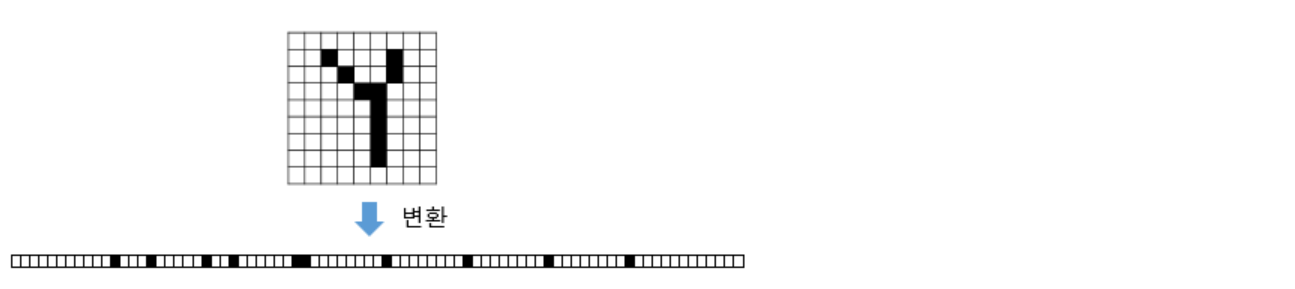

In [23]:
Image("c3.PNG")

4. 결과
    - 1차원으로 변환된 결과는 사람이 보기에도 원래 어떤 이미지였는지 알아보기가 어렵다. 기계도 마찬가지 !
    - 위와 같이 결과는 변환 전에 가지고 있던 **공간적인 구조(spatial structure) 정보가 유실** 된 상태이다. 
        - spatial structure : 거리가 가까운 어떤 픽셀들끼리는 어떤 연관이 있고, 어떤 픽셀들끼리는 값이 비슷하거나 등을 포함
    - 결국 이미지의 공간적인 구조 정보를 보존하면서 학습할 수 있는 방법이 필요해졌다.

5. 이를 위해 사용하는 것이 **합성곱 신경망**이다. 

---------------------------------------------------------------------------------------------------------

#### (2) 채널(Channel)

1. 개념
- 기계는 글자나 이미지보다 숫자(즉, 텐서)를 더 잘 처리할 수 있다.
- 이미지는 **(높이, 너비, 채널)** 이라는 3차원 텐서이다.
    - 높이 : 이미지의 세로 방향 픽셀 수
    - 너비 : 이미지의 가로 방향 픽셀 수
    - 채널 : 색 성분
- 예를 들어, 흑백 이미지는 채널 수가 1이며, 각 픽셀은 0~255 사이의 값을 가진다.

2. 손글씨 데이터 예제
- 아래의 그림은 28x28 픽셀의 손글씨 데이터이다. 
- 이 이미지가 흑백 이미지이므로 채널 수가 1임을 고려하면 (28x28x1)의 크기를 가지는 3차원 텐서이다. 

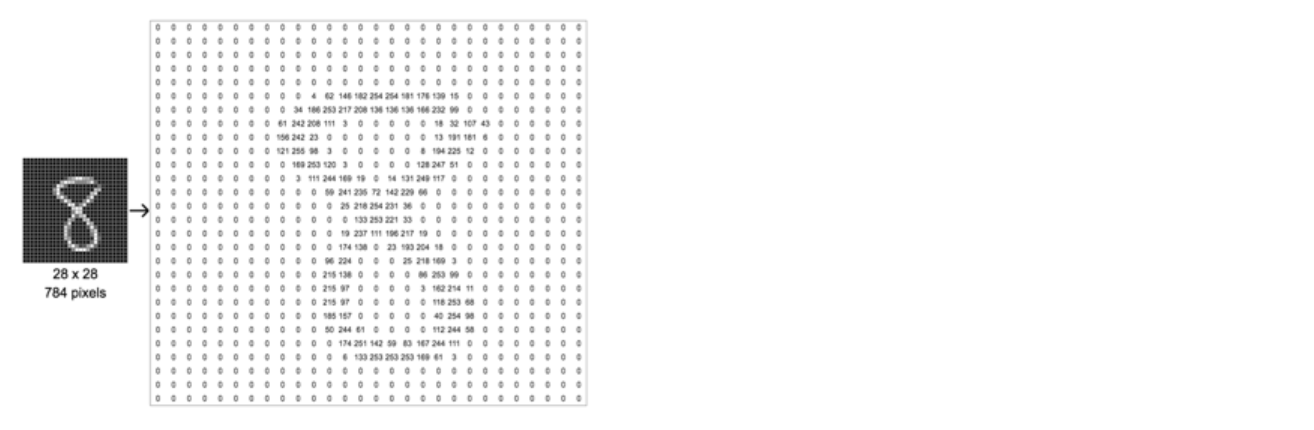

In [24]:
Image("c4.PNG")

3. 컬러 이미지
- 우리가 통상적으로 접하게 되는 컬러 이미지는 Red, Green, Blue로 채널 수가 3개이다.
- 하나의 픽셀은 세 가지 색깔의 조합으로 이루어진다. 
- 만약 높이가 28, 너비가 28인 컬러 이미지가 있다면 이 이미지의 텐서는 (28x28x3)의 크기를 가지는 3차원 텐서이다.

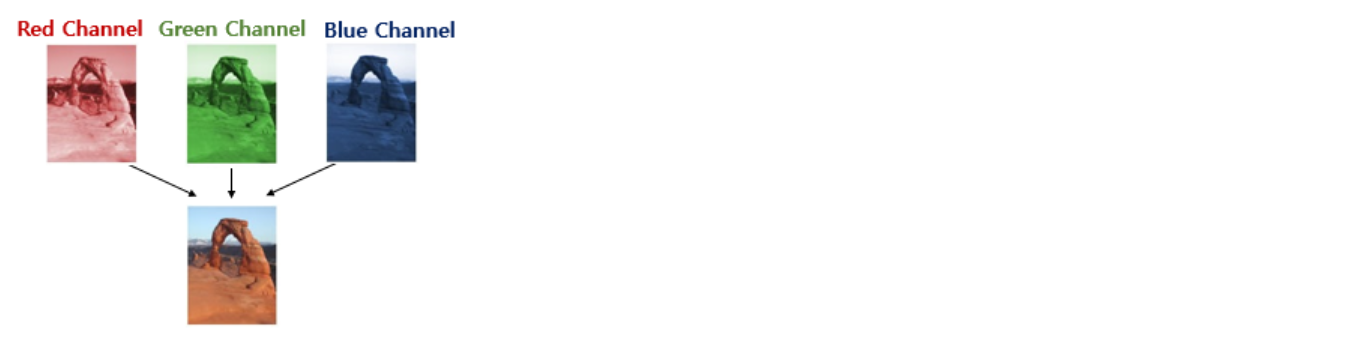

In [25]:
Image("c5.PNG")

4. 채널의 다른 표현
- 채널은 때로는 깊이(depth)라고도 한다.
- 이 경우 이미지는 (높이, 너비, 깊이)라는 3차원 텐서로 표현된다고 말할 수 있다. 

---------------------------------------------------------------------------------------------------------

#### (3) 합성곱 연산(Convolution operation)

1. 합성곱층은 합성곱 연산을 통해서 **이미지의 특징을 추출**하는 역할을 한다.

2. 합성곱 연산이란 ?
- 합성곱은 컨볼루션이라고도 불린다.
- **커널(kernel)** 또는 **필터(filter)** 라는 nxm 크기의 행렬을 가지고, 높이(height) x 너비(width) 크기의 이미지를 처음부터 끝까지 겹치며 훑으면서 nxm 크기의 겹쳐지는 부분의 각 이미지와 커널의 원소 값을 곱해서 모두 더한 값을 출력으로 하는 것을 말한다.  
    - 커널(kernel)은 일반적으로 3x3 또는 5x5를 사용한다. 
    - 커널의 크기는 사용자가 정할 수 있다. 
- 이미지의 가장 왼쪽 위부터 가장 오른쪽 까지 순차적으로 훑는다. 

3. 예제
- 아래는 3x3 크기의 커널로 5x5의 이미지 행렬에 합성곱 연산을 수행하는 과정이다. 
- 한번의 연산을 1스텝(step)이라고 하였을 때, 합성곱 연산의 네번째 스텝까지 이미지와 식으로 표현

3-1. 첫번째 스텝

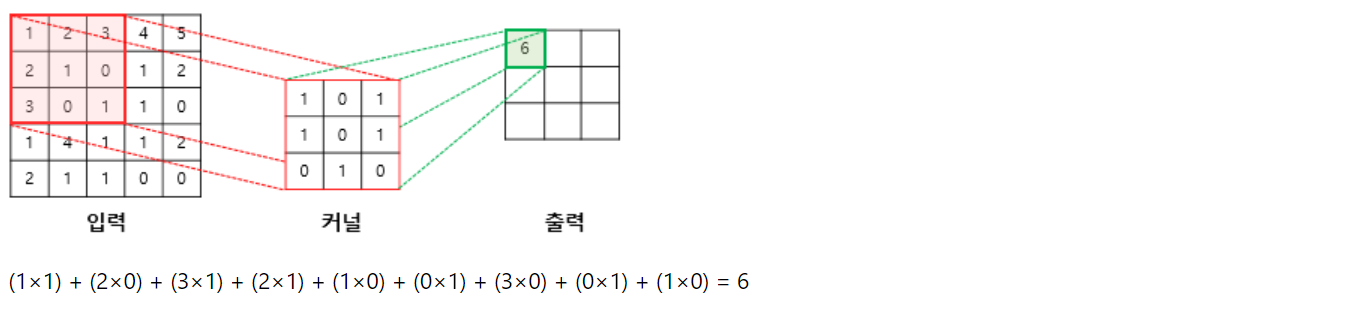

In [27]:
Image("c6.PNG")

3-2. 두번째 스텝

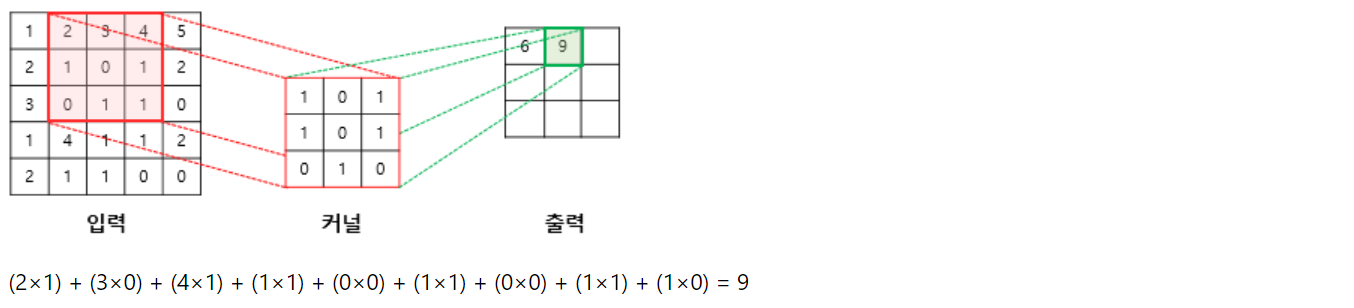

In [28]:
Image("c7.PNG")

3-3. 세번째 스텝

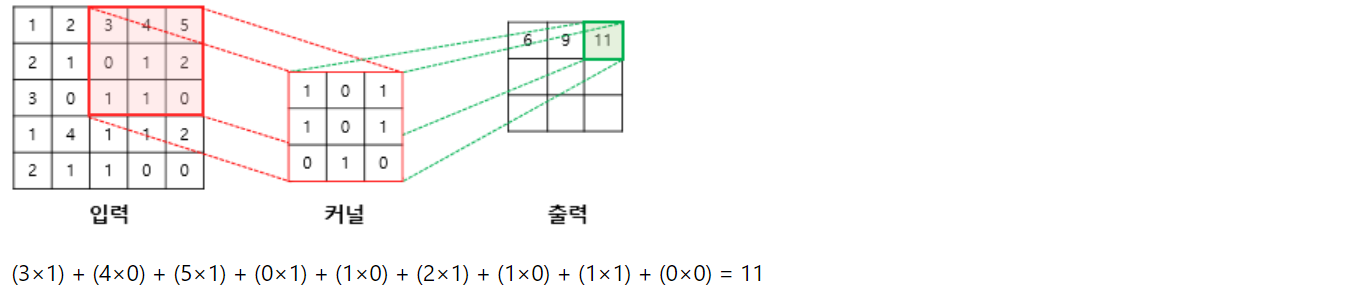

In [29]:
Image("c8.PNG")

3-4. 네번째 스텝

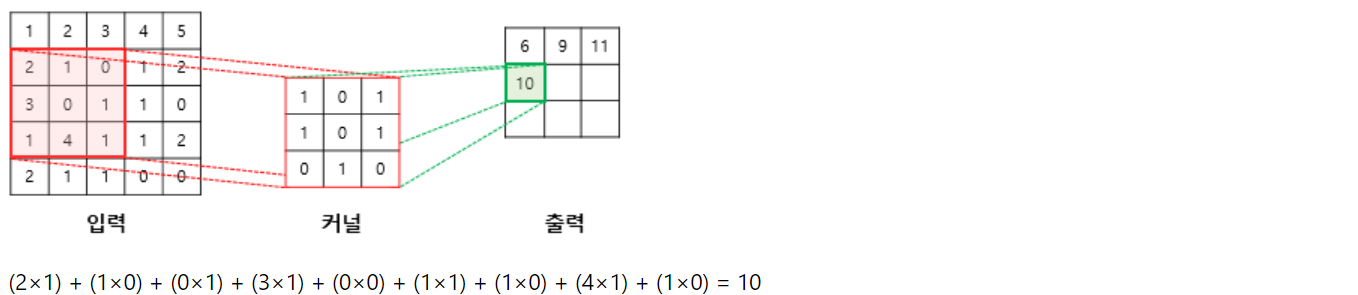

In [30]:
Image("c9.PNG")

- 위의 연산을 총 9번의 스텝까지 마쳤다고 가정하였을 때, 최종 결과

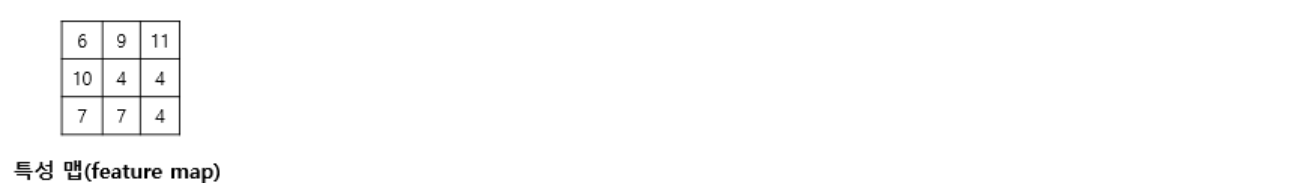

In [31]:
Image("c10.PNG")

4. 특성 맵(feature map)이란 ?
- 위와 같이 입력으로부터 커널을 사용하여 합성곱 연산을 통해 나온 결과

5. 스트라이드(stride)란 ?
- 커널이 이동 범위
- 위의 예제에서는 커널의 이동범위가 한칸 이었지만, 이것도 커널의 크기처럼 사용자가 정할 수 있다.
- 아래의 예제는 스트라이드가 2일 경우에 5x5 이미지에 합성곱 연산을 수행하는 3x3 커널의 움직임을 보여준다.
    - 최종적으로 2x2 크기의 feature map을 얻는다. 

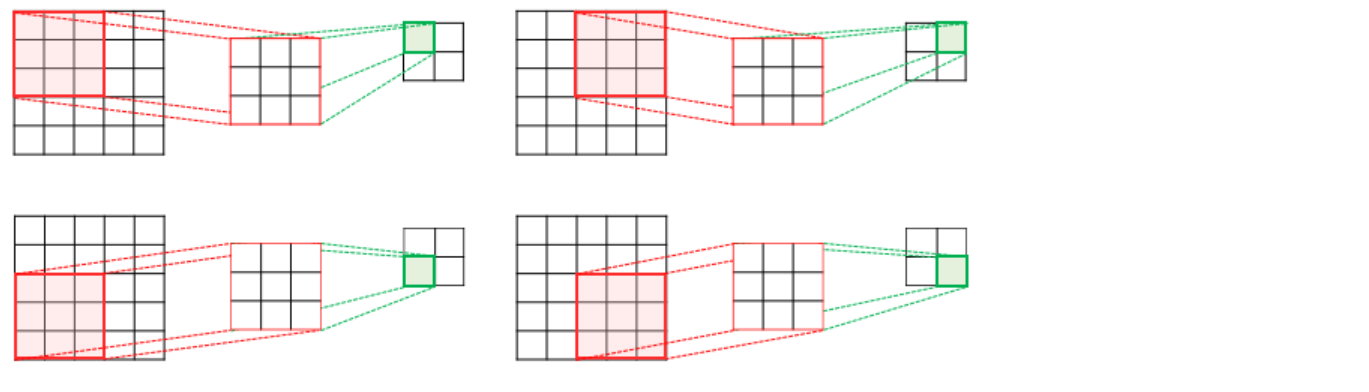

In [32]:
Image("c11.PNG")

---------------------------------------------------------------------------------------------------------

#### (4) 패딩(Padding)

1. 언제 사용하는가 ?
- 위의 예에서 5x5 이미지에 3x3 커널로 합성곱 연산을 하였을 때, 스트라이드가 1일 경우에는 3x3의 특성 맵을 얻었다.
- 이와 같이 합성곱 연산의 결과로 얻은 feature map은 입력보다 크기가 작아진다는 특징이 있다. 
- 만약 합성곱 층을 여러개 쌓았다면 최종적으로 얻은 특성 맵은 초기 입력보다 매우 작아진 상태가 되버린다.
- 합성곱 연산 이후에도 특성 맵의 크기가 입력의 크기와 동일하게 유지되도록 할 때 사용 !

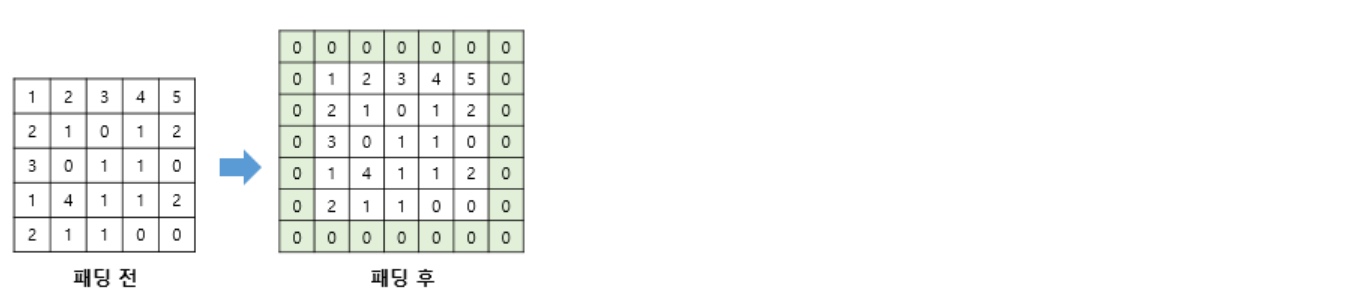

In [33]:
Image("c12.PNG")

2. 의미와 사용방법
- 합성곱 연산을 하기 전에 입력의 가장자리에 지정된 개수의 폭만큼 행과 열을 추가해주는 것을 말한다.
- 즉, 지정된 개수의 폭만큼 테두리를 추가
- 주로 값을 0으로 채우는 제로 패딩(zero padding)을 사용
- 위의 그림은 5x5 이미지에 1폭짜리 제로 패딩을 사용하여 위, 아래에 하나의 행을 좌, 우에 하나의 열을 추가한 형태이다.

3. 자주 사용되는 크기
- 커널은 주로 3x3 또는 5x5를 사용한다.
- 만약 스트라이드가 1이라고 하였을 때
    - 3x3 크기의 커널을 사용한다면 1폭짜리 제로 패딩을 사용
    - 5x5 크기의 커널을 사용한다면 2폭짜리 제로 패딩을 사용
    - 이렇게 하면 입력과 특성 맵의 크기를 보존할 수 있다.
- 예를들어
    - 5x5 크기의이미지에 1폭짜리 제로 패딩을 하면 7x7이 된다
    - 여기에 3x3 커널을 사용하여 1스트라이드로 합성곱을 한 후의 특성 맵은 기존의 입력 이미지의 크기와 같은 5x5가 된다. 

---------------------------------------------------------------------------------------------------------

#### (5) 가중치와 편향

[1] 합성곱 신경망의 가중치

1. 다층 퍼셉트론으로 3x3 이미지를 처리
- 이미지를 1차원 텐서인 벡터로 만들면 3x3=9가 되므로 입력층은 0개의 뉴론을 가진다.
- 4개의 뉴론을 가지는 은닉층을 추가하면 아래의 그림과 같다.
- 각 연결선은 가중치를 의미하므로 아래의 그림에서는 총 9x4=36개의 가중치를 가진다. 

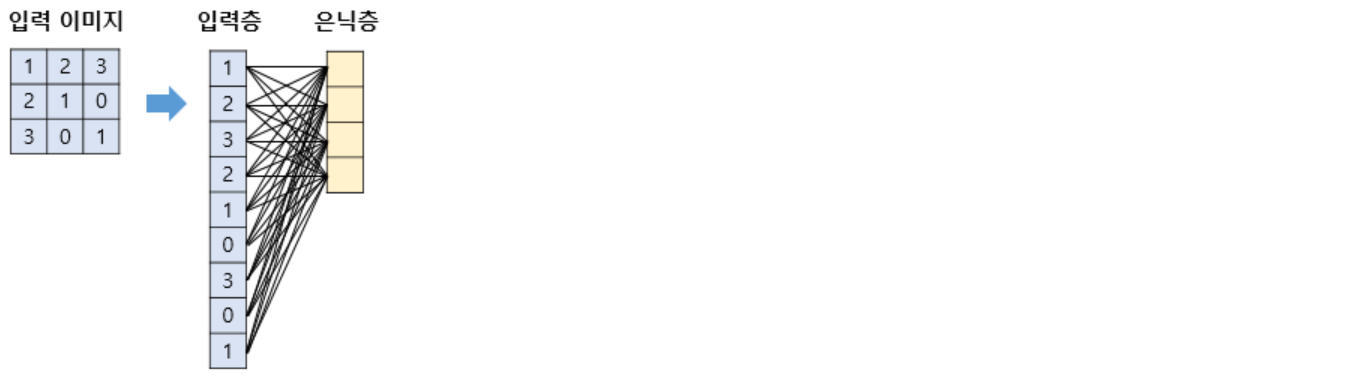

In [34]:
Image("c13.PNG")

2. 합성곱 신경망으로 3x3 이미지를 처리
- 2x2 커널을 사용하고 스트라이드는 1로 한다. 
- *는 합성곱 연산을 의미한다. 

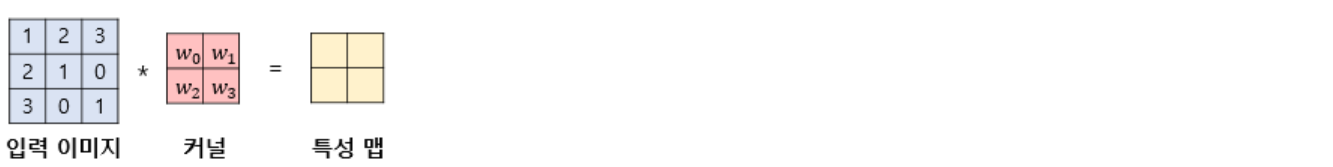

In [35]:
Image("c14.PNG")

3. 사실 합성곱 신경망에서 **가중치**는 **커널 행렬의 원소들**이다. 이를 인공 신경망의 형태로 아래와 같이 표현할 수 있다. 

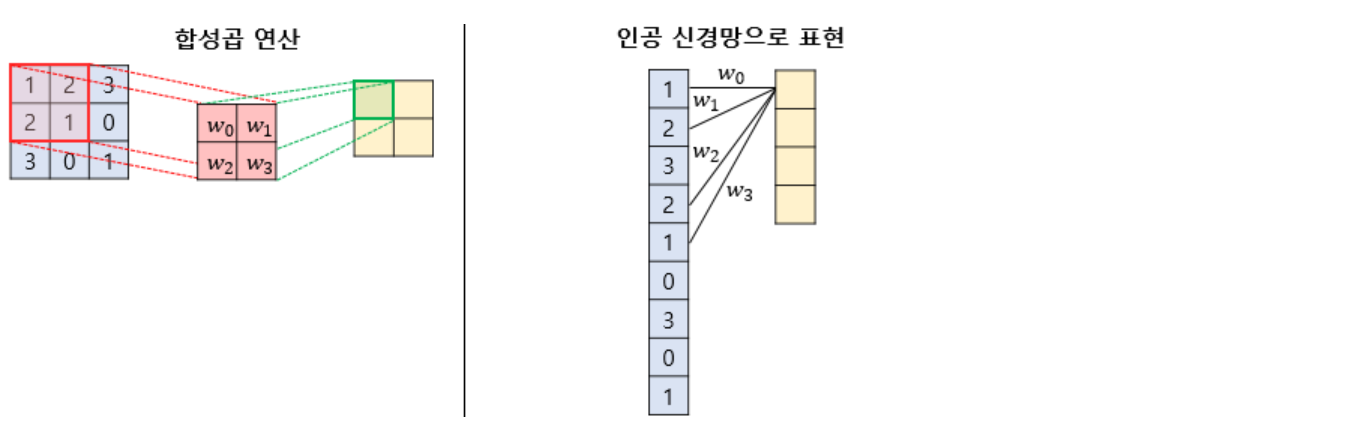

In [36]:
Image("c15.PNG")

4. 합성곱 신경망의 장점
- 최종 feature map을 얻기 위해서 동일한 커널로 이미지 전체를 훑으며 합성곱 연산을 진행한다.
    - 사용되는 가중치는 w0, w1, w2, w3 4개 뿐이다.
- 각 합성곱 연산마다 이미지의 모든 픽셀을 사용하는 것이 아니라, 커널과 맵핑되는 픽셀만을 입력으로 사용
- 결국 합성곱 신경망은 다층 퍼셉트론을 사용할 때보다 훨씬 적은 수의 가중치를 사용하여 공간적 구조 정보를 보존한다는 특징이 있다.

5. 합성곱 신경망도 활성화 함수를 지나는가 ? 
- 합성곱 연산을 통해 얻은 feature map은 다층 퍼셉트론때와 마찬가지로 비선형성 추가를 위해서 활성화 함수를 지나게 된다.
- 렐루 함수나 렐루 함수의 변형들이 주로 사용된다. 
- 합성곱 층(convolution layer) : 합성곱 연산을 통해서 feature map을 얻고, 활성화 함수를 지나는 연산을 하는 합성곱 신경망의 은닉층

[2] 합성곱 신경망의 편향

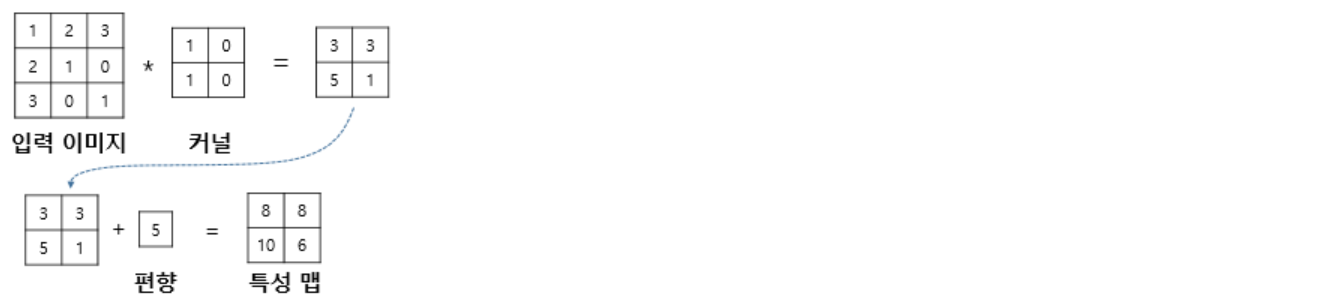

In [37]:
Image("c16.PNG")

- 합성곱 신경망에도 편향(bias)를 추가할 수 있다.
- 만약 편향을 사용한다면 커널을 적용한 뒤에 더해진다. 
- 편향은 하나의 값만 존재하며, 커널이 적용된 결과의 모든 원소에 더해진다. 

---------------------------------------------------------------------------------------------------------

#### (6) 특성 맵의 크기 계산 방법

1. 입력의 크기, 커널의 크기, 스트라이드의 값만 알면 합성곱 연산의 결과인 feature map의 크기를 계산할 수 있다.

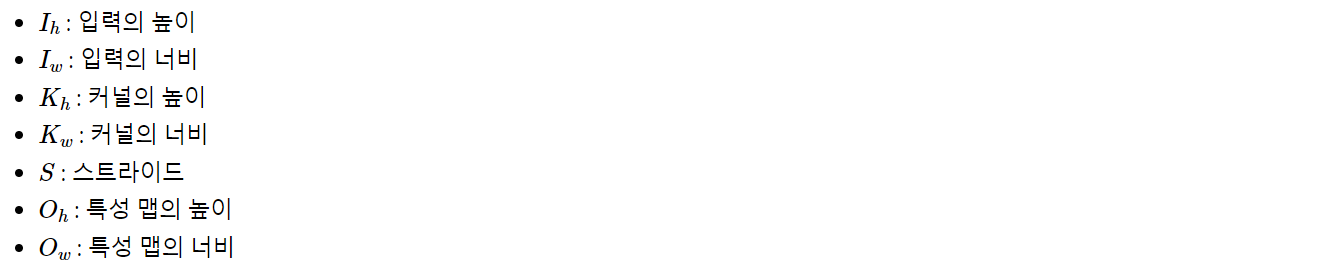

In [41]:
Image("c19.PNG")

2. 위의 정의에 따라 feature map의 높이와 너비는 아래와 같다.
- floor 함수는 소수점 발생 시 소수점 이하를 버리는 역할

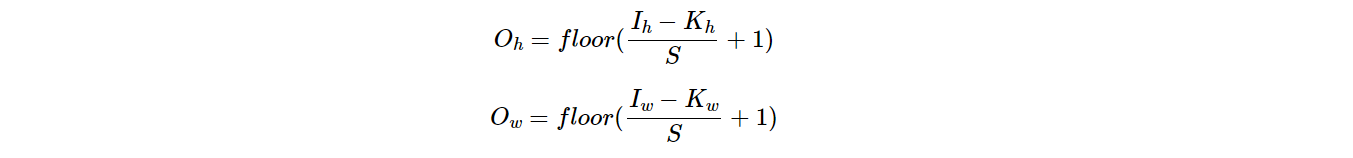

In [38]:
Image("c17.PNG")

3. 패딩의 폭을 P라고 하고, 패딩까지 고려한 식은 아래와 같다. 

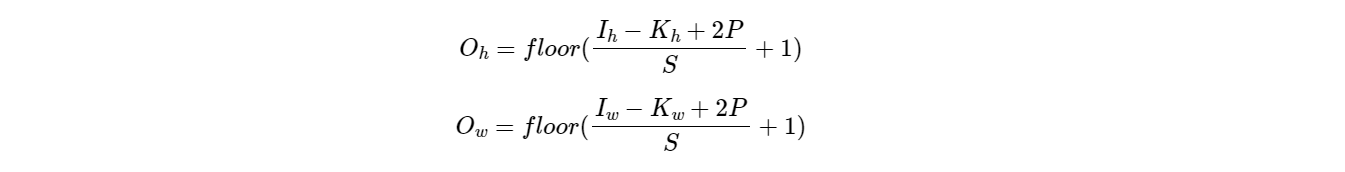

In [39]:
Image("c18.PNG")

---------------------------------------------------------------------------------------------------------

#### (7) 다수의 채널을 가질 경우의 합성곱 연산(3차원 텐서의 합성곱 연산)

1. RGB 컬러의 이미지 
- 실제로 합성곱 연산의 입력은 '다수의 채널을 가진' 이미지 또는 이전 연산의 결과로 나온 feature map일 수 있다.
- 커널의 채널 수도 입력의 채널 수만큼 존재해야 한다. **(입력 데이터의 채널 수 = 커널의 채널 수)**
- 채널 수가 같으므로 합성곱 연산을 채널마다 수행한다. 
- 그 결과를 모두 더하여 최종 feature map을 얻는다. 

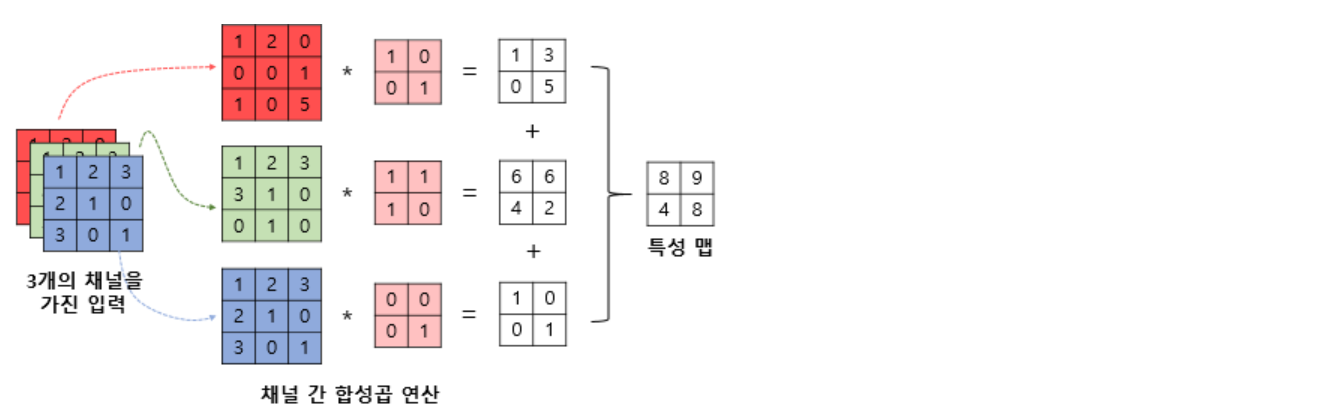

In [40]:
Image("c20.PNG")

2. 그림 설명 
- 3개의 채널을 가진 입력 데이터와 3개의 채널을 가진 커널의 합성곱 연산
    - 커널의 각 채널끼리의 크기는 같아야 한다.
    - 위의 연산에서 사용되는 커널은 3개의 커널이 아니라 3개의 채널을 가진 1개의 커널 !!
- 각 채널 간 합성곱 연산을 마치고 그 결과를 모두 더해서 하나의 채널을 가지는 feature map을 만든다. 
    - 높이3, 너비3, 채널3의 입력이 높이2, 너비2, 채널3의 커널과 합성곱 연산을 하여 높이2, 너비2, 채널1의 feature map을 얻는다는 의미
    - 합성곱 연산의 결과로 얻은 feature map의 채널 차원은 RGB 채널 등과 같은 컬러의 의미를 담고 있지 않는다.

---------------------------------------------------------------------------------------------------------

#### (8) 3차원 텐서의 합성곱 연산

1. 일반화를 위해 사용하는 각 변수 정의

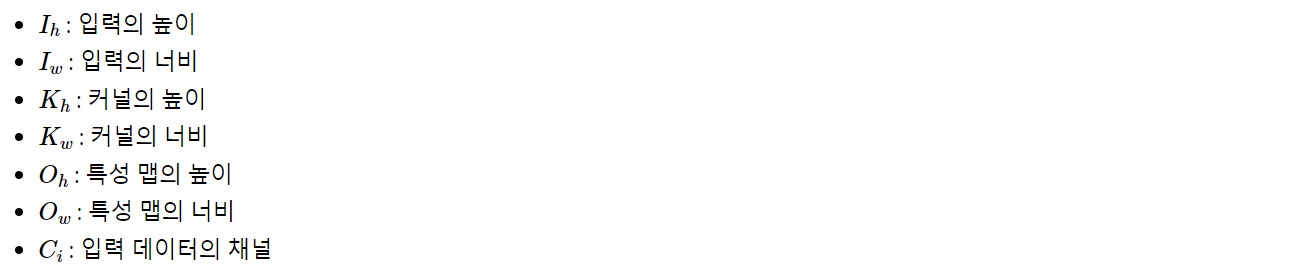

In [42]:
Image("c21.PNG")

2. 3차원 텐서의 합성곱 연산 도식화

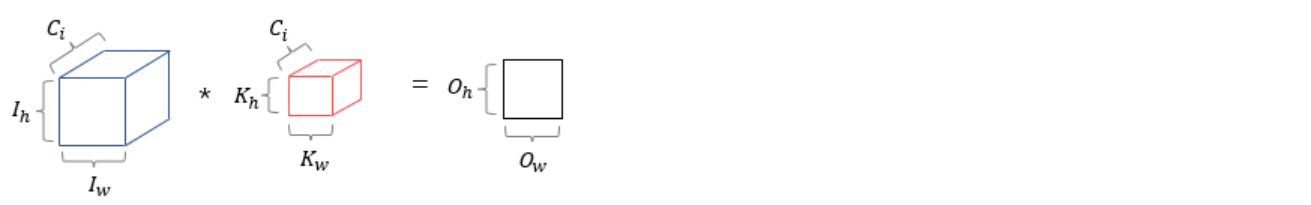

In [43]:
Image("c22.PNG")

- 높이I_h, 너비I_w, 채널C_i의 입력 데이터는 동일한 채널 수 C_i를 가지는 높이K_h, 너비K_w의 커널과 합성곱 연산을 하여 높이O_h, 너비O_w, 채널 1의 feature map을 얻는다. 

3. 하나의 입력에 여러개의 커널을 사용하는 합성곱 연산 도식화

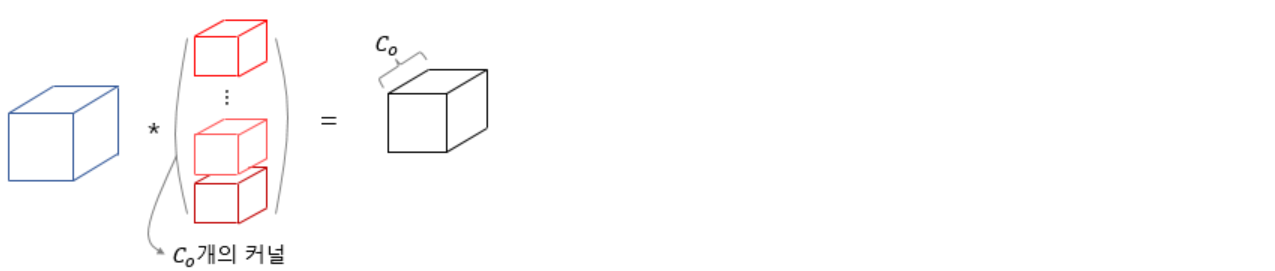

In [44]:
Image("c23.PNG")

- C_o : 합성곱 연산에 사용하는 커널의 수
- 합성곱 연산에서 다수의 커널을 사용할 경우, 사용한 커널 수는 합성곱 연산의 결과로 나오는 feature map의 채널 수가 된다.
- 이제는 커널의 크기, 입력 데이터의 채널 수(C_i), 출력 데이터의 채널 수(C_o)가 주어졌을 때, 가중치 매개변수의 총 개수를 구할 수 있다.
    - 가중치는 커널의 원소들이므로 하나의 커널의 하나의 채널에는 K_i x K_o 개의 매개변수를 갖는다.
    - 합성곱 연산을 하려면 커널의 채널 수는 입력 데이터의 채널 수와 같아야 한다.
    - 이에 따라 하나의 커널이 가지는 매개변수는 K_i x K_o x C_i개이다.
    - 이러한 커널이 총 C_o개가 있어야 한다.
- 가중치 매개변수의 총 개수 : K_i x K_o x C_i x C_o

---------------------------------------------------------------------------------------------------------

#### 9. 풀링(Pooling)

- 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적이다.
- 풀링 층에서는 feature map을 **다운샘플링하여 특성 맵의 크기를 줄이는** 풀링 연산이 이루어진다. 

1. 최대 풀링(max pooling)
- 풀링 연산에서도 합성곱 연산과 마찬가지로 커널과 스트라이드 개념을 가진다. 
- 아래의 그림은 스트라이드가 2일 때, 2x2 크기 커널로 맥스 풀링 연산을 하면 feature map이 절반의 크기로 다운샘플링 된다.
- 맥스 풀링은 커널과 겹치는 영역 안에서 최대값을 추출하는 방식으로 다운샘플링

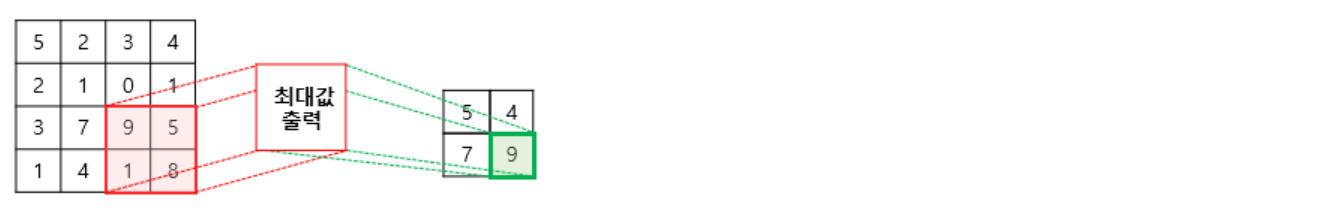

In [45]:
Image("c24.PNG")

2. 평균 풀링(average pooling)
- 최대값이 아닌 평균값을 추출하는 연산

3. 합성곱 연산과의 비교
- 커널과 스트라이드 개념이 존재한다는 점에서 합성곱 연산과 유사
- 학습해야 할 가중치가 없다.
- 연산 후에 채널 수가 변하지 않는다. 

---------------------------------------------------------------------------------------------------------

[참고 자료]
- http://taewan.kim/post/cnn/
- https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/
- https://excelsior-cjh.tistory.com/152
- https://buomsoo-kim.github.io/keras/2018/04/28/Easy-deep-learning-with-Keras-7.md/
- https://becominghuman.ai/not-just-introduction-to-convolutional-neural-networks-part-1-56a36b938592
- https://brohrer.github.io/how_convolutional_neural_networks_work.html
- https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/
- https://www.kdnuggets.com/2018/04/derivation-convolutional-neural-network-fully-connected-step-by-step.html
- https://www.slideshare.net/leeseungeun/cnn-vgg-72164295

